In [15]:
# step 1 -- cleaning the dataset

import pandas as pd

# load the dataset
file_path = 'FinancialMarketData.xlsx'
data = pd.ExcelFile(file_path)

# load relevant sheet (EWS)
ews_data = data.parse('EWS')

# inspect first few rows
# print(ews_data.head())

# check for missing or problematic data
# print(ews_data.info())

In [16]:
# check for missing data
print(ews_data.isnull().sum())

Y            0
Data         0
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64


In [17]:
# convert 'Data' to datetime
ews_data['Data'] = pd.to_datetime(ews_data['Data'])

# sort the data by date (optional but helpful for time series)
ews_data.sort_values('Data', inplace=True)

In [18]:
print(ews_data.head())

   Y       Data  XAU BGNL  ECSURPUS  BDIY     CRY     DXY     JPY     GBP  \
0  0 2000-01-11    283.25     0.077  1388  157.26  100.56  105.86  1.6460   
1  0 2000-01-18    287.65     0.043  1405  165.01  101.86  105.47  1.6383   
2  0 2000-01-25    287.15     0.135  1368  167.24  102.41  106.04  1.6496   
3  0 2000-02-01    282.75     0.191  1311  166.85  104.92  107.85  1.6106   
4  1 2000-02-08    298.40     0.312  1277  165.43  104.22  109.30  1.6108   

     Cl1  ...  LP01TREU  EMUSTRUU  LF94TRUU     MXUS    MXEU     MXJP    MXBR  \
0  25.77  ...  116.4635  230.5267  123.7616  1416.12  127.75   990.59  856.76   
1  28.85  ...  117.2674  231.3770  123.7616  1428.79  129.50   993.98  925.22   
2  28.28  ...  117.9946  232.3895  123.7616  1385.93  126.48   974.83  886.93   
3  28.22  ...  120.5100  231.9417  122.3281  1385.31  129.19  1007.12  842.60   
4  28.02  ...  118.7914  237.8117  122.3281  1411.95  134.67  1034.58  945.15   

     MXRU    MXIN   MXCN  
0  224.33  217.34  34.3

In [19]:
ews_data.to_csv('cleaned_financial_data.csv', index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


Y
0    874
1    237
Name: count, dtype: int64


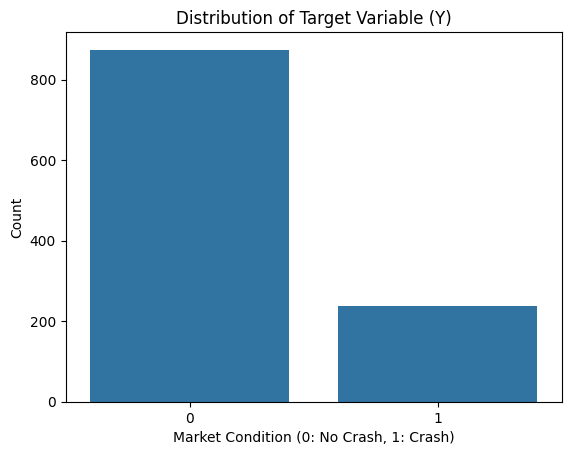

In [20]:
# STEP 2: Exporatory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# check the distribution of target variable
print(ews_data['Y'].value_counts())

# plot the distribution
sns.countplot(x='Y', data=ews_data)
plt.title("Distribution of Target Variable (Y)")
plt.xlabel("Market Condition (0: No Crash, 1: Crash)")
plt.ylabel("Count")
plt.show()

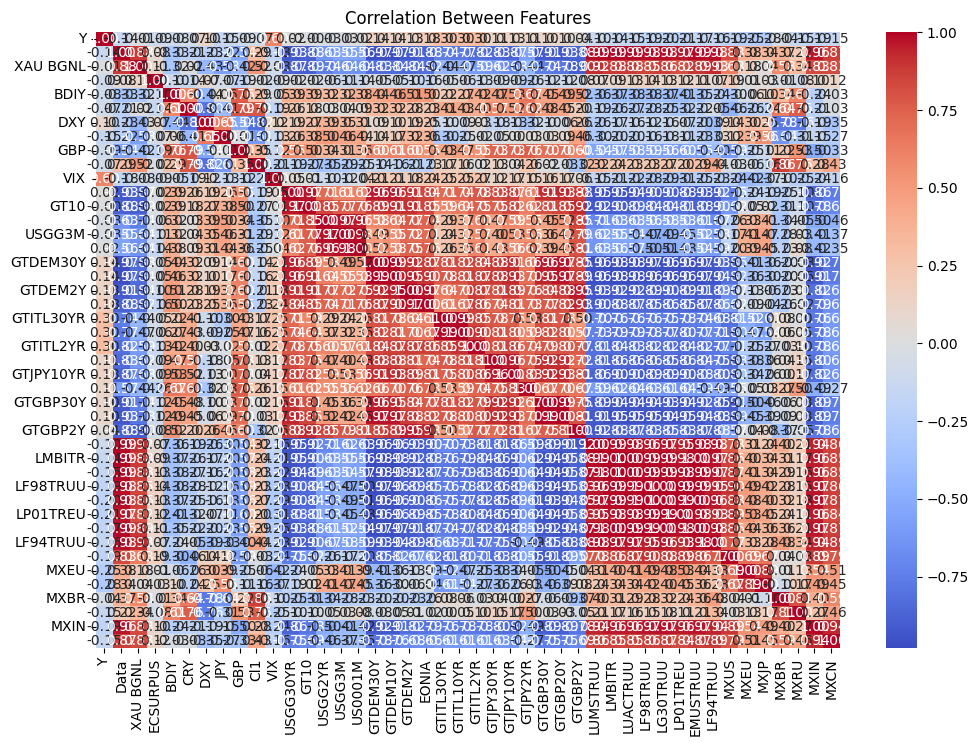

In [21]:
# compute correlation matrix
correlation_matrix = ews_data.corr()

# plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

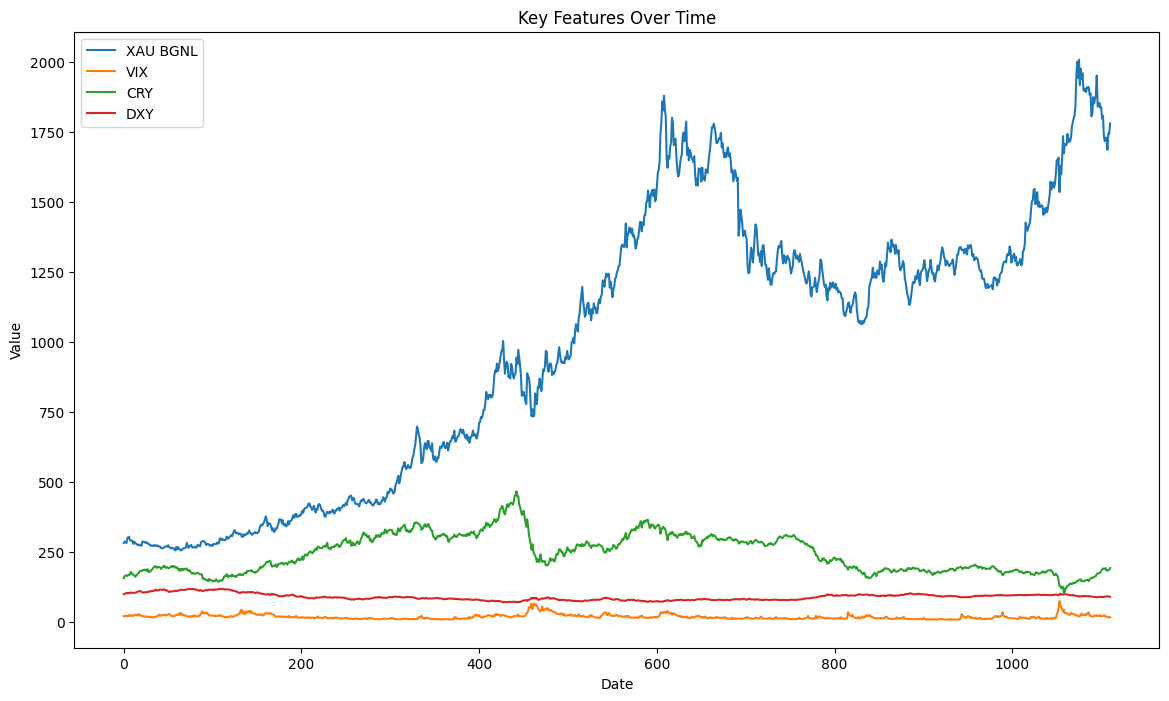

In [22]:
# Select key features for visualization
key_features = ['XAU BGNL', 'VIX', 'CRY', 'DXY']

# Plot time series for these features

ews_data[key_features].plot(figsize=(14, 8))
plt.title("Key Features Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(key_features)
plt.show()

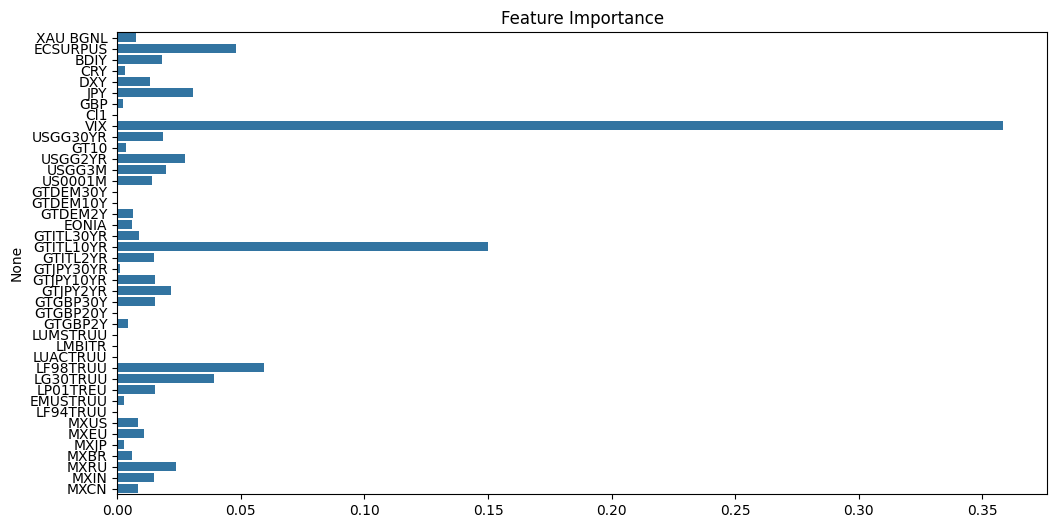

In [23]:
from sklearn.tree import DecisionTreeClassifier

# train a basic Decision Tree to identify important features
X = ews_data.drop(columns=['Y'])
X = X.drop(columns=['Data'])
y = ews_data['Y']

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)

# Plot feature importance
importances = tree_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

In [24]:
# keep features with importance > 0.01
important_features = feature_names[importances > 0.01]
X = X[important_features]
print("Selected Features:", important_features)

Selected Features: Index(['ECSURPUS', 'BDIY', 'DXY', 'JPY', 'VIX', 'USGG30YR', 'USGG2YR',
       'USGG3M', 'US0001M', 'GTITL10YR', 'GTITL2YR', 'GTJPY10YR', 'GTJPY2YR',
       'GTGBP30Y', 'LF98TRUU', 'LG30TRUU', 'LP01TREU', 'MXEU', 'MXRU', 'MXIN'],
      dtype='object')


In [25]:
# STEP 4 -- Train and Evaluate a Predictive Model
from sklearn.model_selection import train_test_split

# define features (X) and target (Y)
X = ews_data[important_features]
y = ews_data['Y']

# split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (888, 20)
Testing set size: (223, 20)


In [26]:
# train the model

from sklearn.ensemble import RandomForestClassifier

# initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       177
           1       0.87      0.74      0.80        46

    accuracy                           0.92       223
   macro avg       0.90      0.86      0.88       223
weighted avg       0.92      0.92      0.92       223



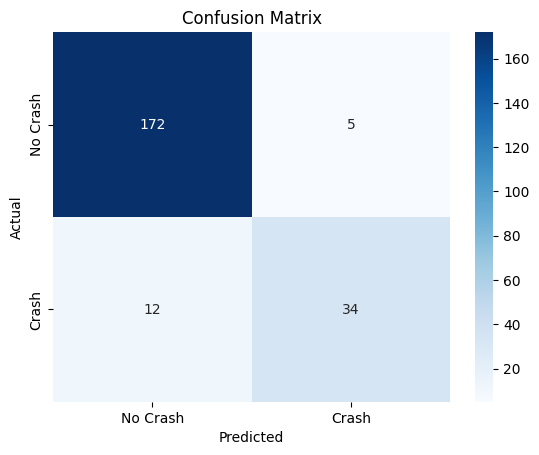

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crash', 'Crash'], yticklabels=['No Crash', 'Crash'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [10, 20, 30, None],      # Depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples at a leaf node
}

In [29]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Use F1-score to handle imbalanced data
    verbose=2,
    n_jobs=-1  # Use all available cores for faster computation
)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       177
           1       0.85      0.74      0.79        46

    accuracy                           0.92       223
   macro avg       0.89      0.85      0.87       223
weighted avg       0.92      0.92      0.92       223



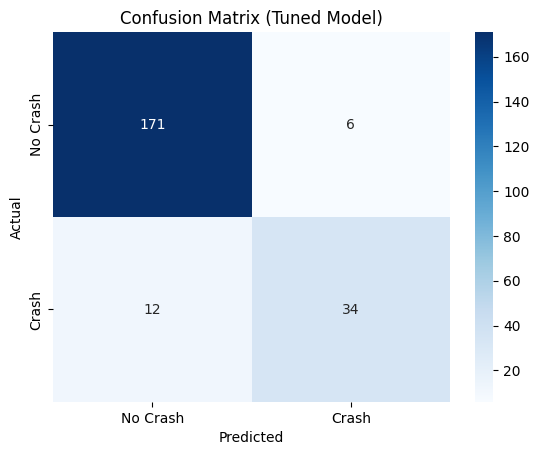

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300],            # Number of trees
    'max_depth': [10, 20, None],               # Maximum tree depth
    'min_samples_split': [2, 5, 10],           # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]              # Minimum samples at a leaf node
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,                # Number of random combinations to try
    cv=3,                     # 3-fold cross-validation
    scoring='f1',             # F1-score for imbalanced datasets
    verbose=2,                # Show progress
    n_jobs=-1,                # Use all available cores
    random_state=42           # For reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Use the best model for predictions
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate performance
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

# Plot confusion matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crash', 'Crash'], yticklabels=['No Crash', 'Crash'])
plt.title("Confusion Matrix (Tuned Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
print(ews_data['Data'].max())  # Check the latest date in the dataset
print(ews_data['Data'].min())  # Check the earliest date in the dataset

2021-04-20 00:00:00
2000-01-11 00:00:00


In [33]:
import pandas as pd
import numpy as np

# Step 1: Randomly sample a subset of the existing data
simulated_data = ews_data.sample(frac=0.2, random_state=42)  # 20% of the original data

# Step 2: Adjust the 'Data' column to simulate future dates
simulated_data['Data'] = simulated_data['Data'] + pd.DateOffset(years=2)

# Step 3: Slightly modify feature values to mimic new data
# Add random noise to numerical features
numeric_features = simulated_data.select_dtypes(include=['float64', 'int64']).columns
simulated_data[numeric_features] = simulated_data[numeric_features] * (1 + np.random.normal(0, 0.02, size=simulated_data[numeric_features].shape))

# Ensure no negative values (if required by your features)
simulated_data[numeric_features] = simulated_data[numeric_features].clip(lower=0)

# Step 4: Drop any unnecessary columns (e.g., target column if present)
X_test_post_2021 = simulated_data[important_features]  # Select only the important features
print("Simulated Post-2021 Data:")
print(X_test_post_2021.head())

Simulated Post-2021 Data:
     ECSURPUS          BDIY         DXY         JPY        VIX  USGG30YR  \
436  0.000000  12126.202834   72.548123  102.702561  17.573779  4.679402   
539  0.522380   3784.825828   85.550058   93.217995  27.899255  4.368371   
56   0.000000   1484.737078  112.586351  112.687290  22.378661  5.633485   
695  0.000000    899.352151   81.241964  100.241909  12.418585  3.066716   
722  0.071964   1571.409210   84.951672  100.216925  12.715612  3.875101   

      USGG2YR    USGG3M   US0001M  GTITL10YR  GTITL2YR  GTJPY10YR  GTJPY2YR  \
436  2.240100  1.899906  2.466889   4.630872  4.279393   1.678704  0.804032   
539  0.816716  0.146804  0.327960   3.978247  1.577672   1.322995  0.170524   
56   4.659327  4.842726  5.471463   4.990754  4.649144   1.462497  0.385928   
695  0.224761  0.025204  0.203466   3.767915  1.246341   0.594491  0.108955   
722  0.324794  0.057228  0.165321   4.099557  1.216846   0.600579  0.088707   

     GTGBP30Y     LF98TRUU     LG30TRUU   

In [34]:
# Make predictions on simulated data
post_2021_predictions = best_model.predict(X_test_post_2021)
print("Predictions on Simulated Post-2021 Data:", post_2021_predictions)

Predictions on Simulated Post-2021 Data: [0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [36]:
# Define an investment rule based on predictions
def investment_rule(predictions, data):
    portfolio = 10000  # Starting portfolio value
    for pred in predictions:
        if pred == 1:  # Crash predicted
            portfolio *= 0.95  # Assume a 5% loss
        else:  # No crash predicted
            portfolio *= 1.02  # Assume a 2% gain
    return portfolio

# Apply the rule to post-2021 predictions
final_portfolio_value = investment_rule(post_2021_predictions, X_test_post_2021)
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")

Final Portfolio Value: $54441.31


In [38]:
# Simulate portfolio growth with the model's predictions
portfolio_with_model = investment_rule(post_2021_predictions, X_test_post_2021)

# Baseline portfolio (no model, static 2% daily gain)
baseline_portfolio = 10000 * (1.02 ** len(post_2021_predictions))  # 2% gain every day

# Compare the results
print(f"With Model: ${portfolio_with_model:.2f}")
print(f"Baseline Portfolio: ${baseline_portfolio:.2f}")

With Model: $54441.31
Baseline Portfolio: $811405.84


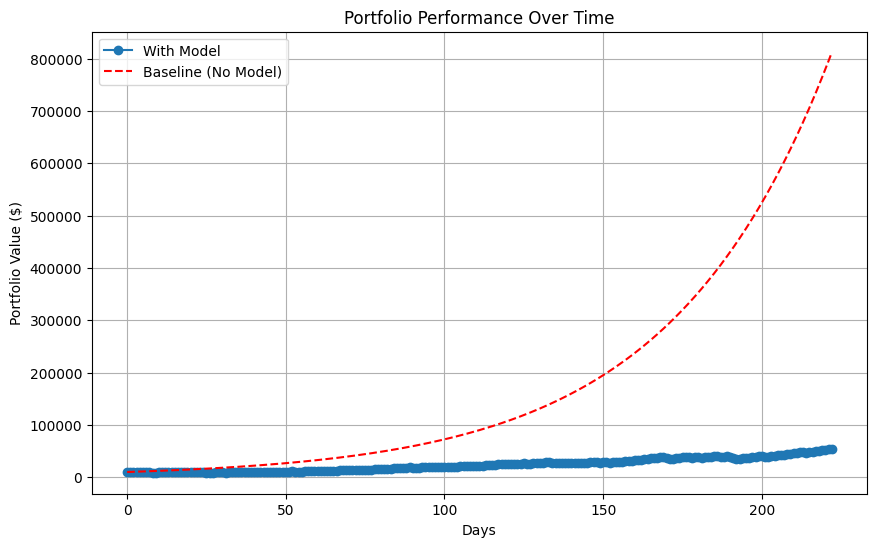

In [41]:
# Simulate portfolio over time with the model
portfolio_values = [10000]  # Start with initial portfolio value
for pred in post_2021_predictions:
    if pred == 1:  # Crash predicted
        portfolio_values.append(portfolio_values[-1] * 0.95)  # 5% loss
    else:  # No crash predicted
        portfolio_values.append(portfolio_values[-1] * 1.02)  # 2% gain

# Simulate baseline portfolio over time
baseline_values = [10000 * (1.02 ** i) for i in range(len(portfolio_values))]

# Plot portfolio growth
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(portfolio_values, label="With Model", marker='o')
plt.plot(baseline_values, label="Baseline (No Model)", linestyle='--', color='red')
plt.title("Portfolio Performance Over Time")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

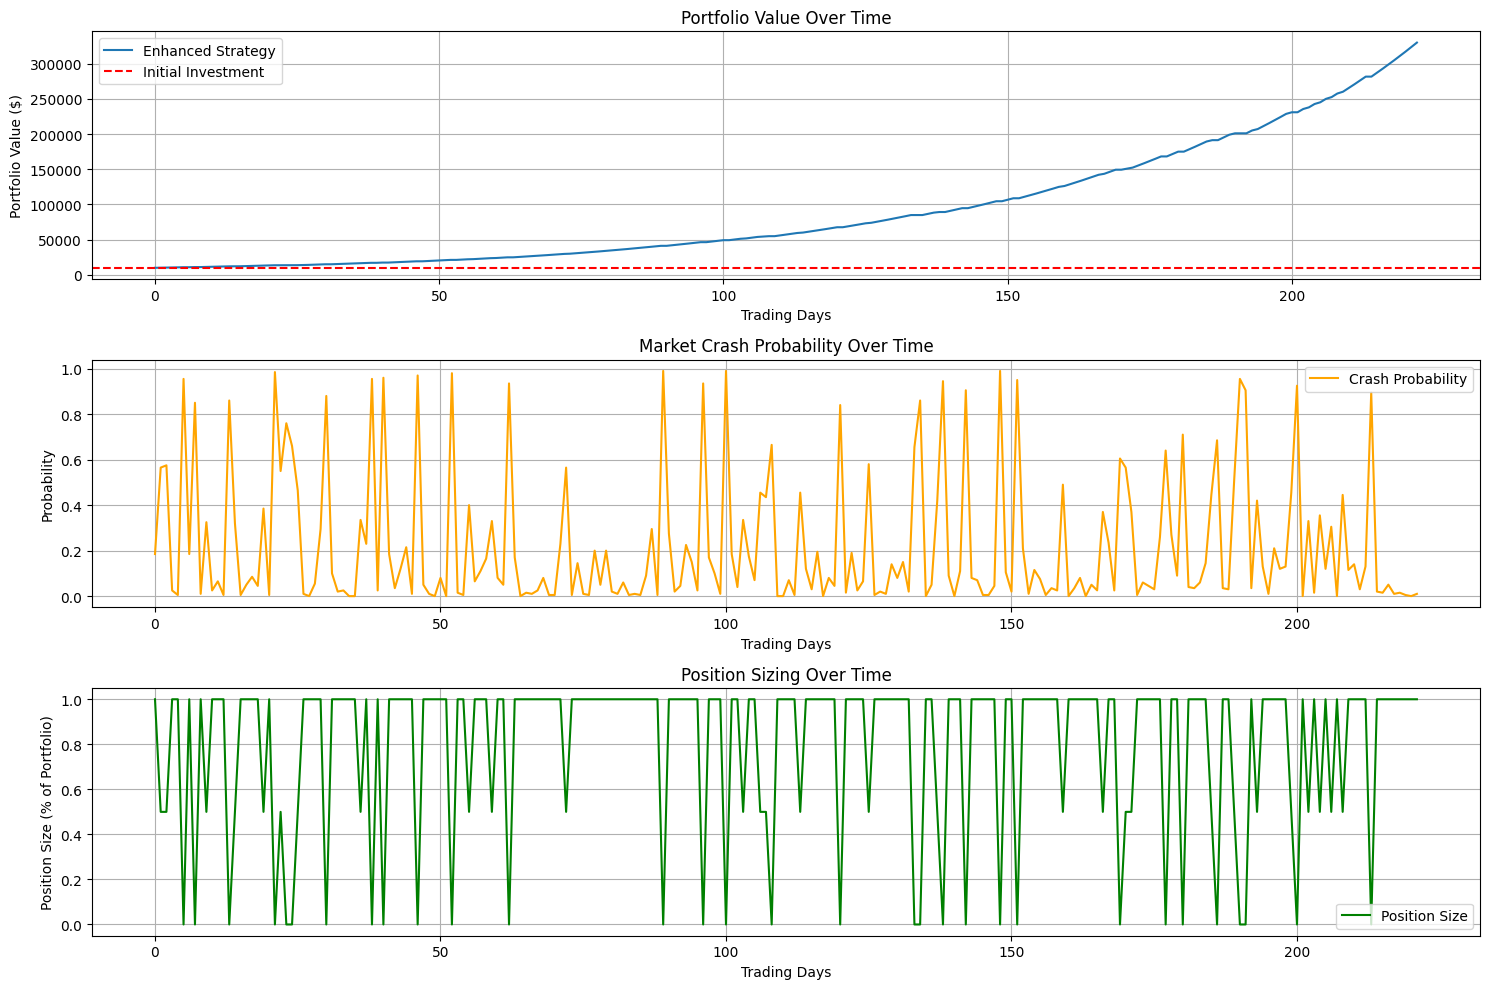

Final Portfolio Value: $330025.63
Total Return: 3200.26%
Average Position Size: 0.80


In [42]:
# Enhanced Investment Strategy with Risk Management
import numpy as np

def enhanced_investment_strategy(model, data, initial_portfolio=10000):
    # Get prediction probabilities instead of just binary predictions
    crash_probabilities = model.predict_proba(data)[:, 1]

    portfolio_values = [initial_portfolio]
    current_portfolio = initial_portfolio
    positions = []  # Track position sizes

    # Risk management parameters
    max_risk_per_trade = 0.02
    stop_loss = 0.05

    for prob in crash_probabilities:
        # Dynamic position sizing based on crash probability
        if prob < 0.3:
            position_size = 1.0
        elif prob < 0.6:
            position_size = 0.5
        else:
            position_size = 0.0

        positions.append(position_size)

        # Calculate returns (using your existing assumptions)
        if position_size > 0:
            if prob >= 0.6:  # High crash probability
                market_return = -0.05  # Assumed loss during crash
            else:
                market_return = 0.02  # Your existing 2% gain assumption

            position_return = market_return * position_size

            # Apply stop loss
            if position_return < -stop_loss:
                position_return = -stop_loss

            current_portfolio *= (1 + position_return)

        portfolio_values.append(current_portfolio)

    return np.array(portfolio_values), crash_probabilities, positions

# Test the enhanced strategy
portfolio_values, crash_probs, positions = enhanced_investment_strategy(best_model, X_test_post_2021)

# Create subplots for better visualization
plt.figure(figsize=(15, 10))

# Portfolio Value Plot
plt.subplot(3, 1, 1)
plt.plot(portfolio_values, label='Enhanced Strategy')
plt.axhline(y=10000, color='r', linestyle='--', label='Initial Investment')
plt.title('Portfolio Value Over Time')
plt.xlabel('Trading Days')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)

# Crash Probability Plot
plt.subplot(3, 1, 2)
plt.plot(crash_probs, color='orange', label='Crash Probability')
plt.title('Market Crash Probability Over Time')
plt.xlabel('Trading Days')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

# Position Size Plot
plt.subplot(3, 1, 3)
plt.plot(positions, color='green', label='Position Size')
plt.title('Position Sizing Over Time')
plt.xlabel('Trading Days')
plt.ylabel('Position Size (% of Portfolio)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print performance metrics
final_return = ((portfolio_values[-1] - portfolio_values[0]) / portfolio_values[0]) * 100
print(f"Final Portfolio Value: ${portfolio_values[-1]:.2f}")
print(f"Total Return: {final_return:.2f}%")
print(f"Average Position Size: {np.mean(positions):.2f}")